<a href="https://colab.research.google.com/github/Tejatrix/Tejatrix/blob/main/BinaryClassification_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
tf.random.set_seed(32)


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
all_ds = pd.read_excel('/content/drive/MyDrive/heart_failure_clinical_records_dataset.xlsx')

In [7]:
 all_ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **Cleaning Data**

In [9]:
# Checking for Null values 
all_ds.isnull().sum(1)

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int64

In [10]:
# No null values. Hence we don't have to replace any rows.

In [11]:
# "time" signifies only the order in which entries are made. Hence we are dropping the column.
all_ds = all_ds.drop('time', axis=1)

# **Rearranging Data for better performence**

In [12]:
data = all_ds.sample(frac=1)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
112,50.0,0,369,1,25,0,252000.00,1.60,136,1,0,0
133,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,0
84,59.0,1,280,1,25,1,302000.00,1.00,141,0,0,1
273,42.0,0,64,0,40,0,189000.00,0.70,140,1,0,0
118,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
276,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,0
247,64.0,0,143,0,25,0,246000.00,2.40,135,1,0,0
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,1
196,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,0


In [13]:
#Dividing data into training data and temperory test data.
train_data,temp_test_data = train_test_split(data,test_size = 0.4)

In [14]:
print( train_data.shape)
print ( temp_test_data.shape)

(179, 12)
(120, 12)


In [15]:
#Dividing the temperory test data to testing and validation data
test_data,valid_data = train_test_split(temp_test_data,test_size = 0.5)

In [16]:
print( train_data.shape)
print ( test_data.shape)
print( valid_data.shape)

(179, 12)
(60, 12)
(60, 12)


# **EDA**

In [17]:
# Pairwise plot to find any anomolies.
train_stats = train_data.describe()
train_stats.pop('DEATH_EVENT')

count    179.000000
mean       0.329609
std        0.471390
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: DEATH_EVENT, dtype: float64

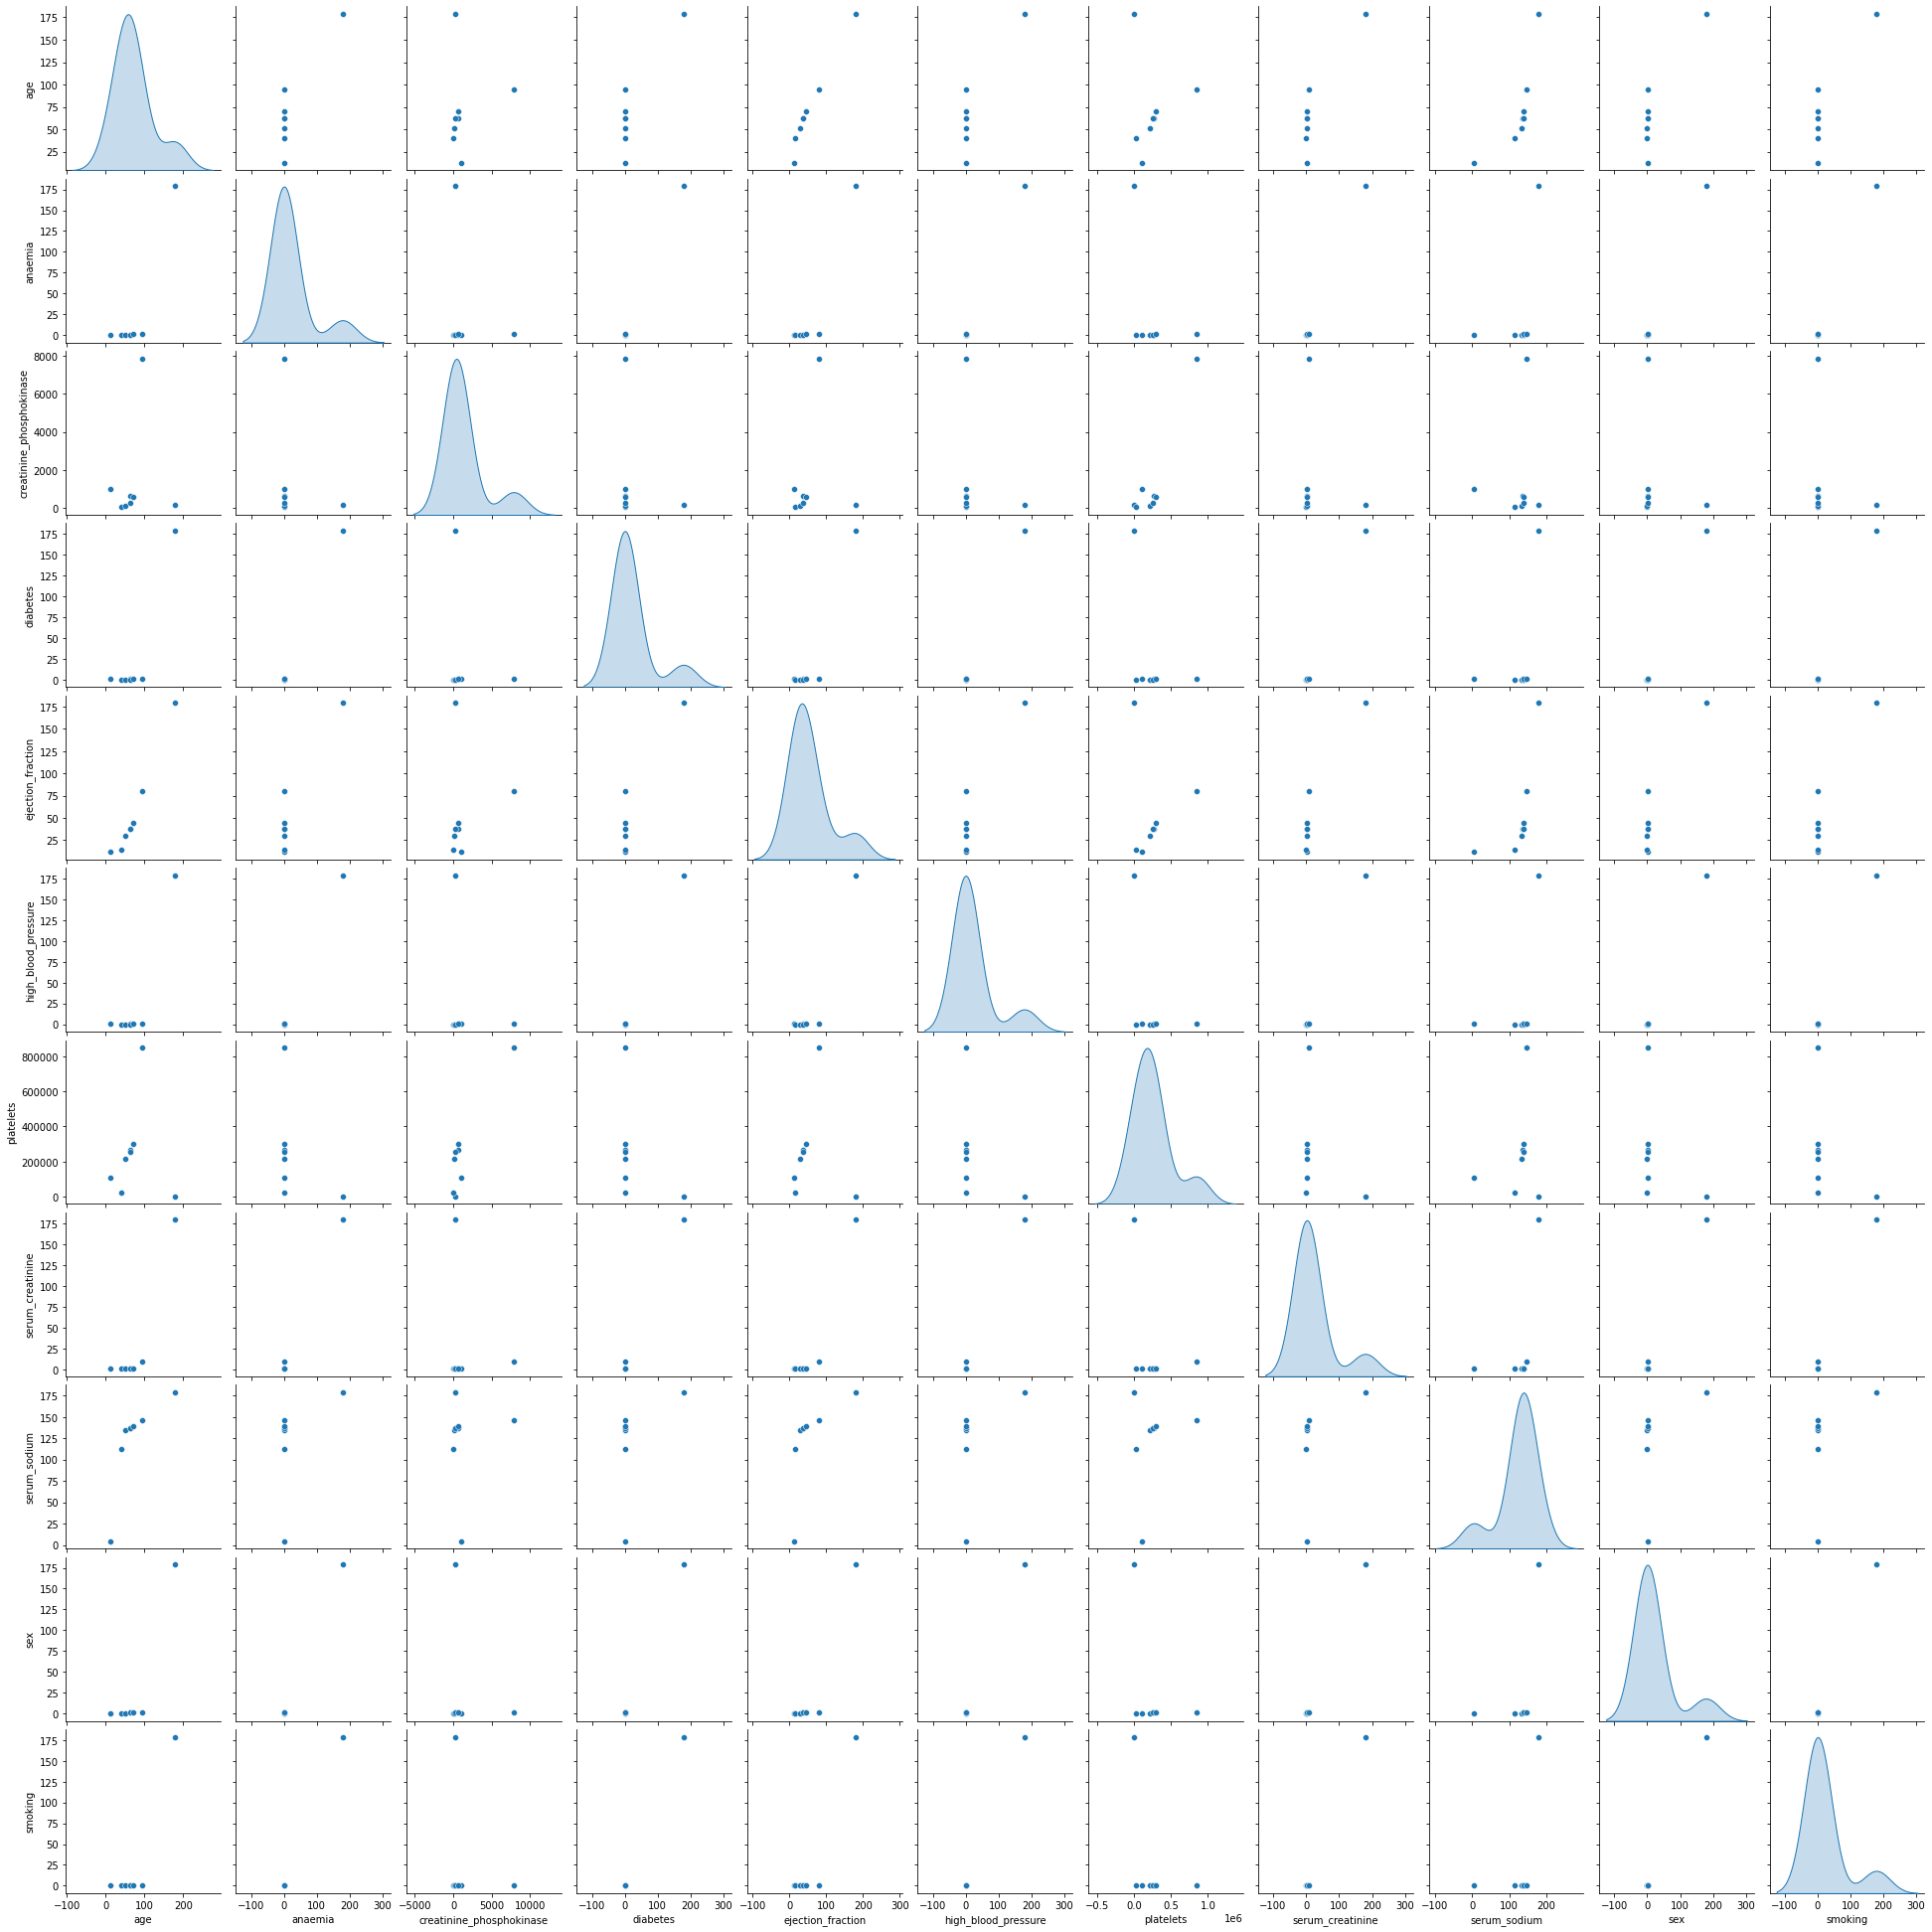

In [18]:
sns.pairplot(train_stats[train_stats.columns], diag_kind = "kde")

In [19]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,179.0,62.279330,12.699649,40.0,51.0,62.0,70.0,95.0
anaemia,179.0,0.413408,0.493826,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,179.0,639.553073,998.163246,47.0,129.0,292.0,582.0,7861.0
diabetes,179.0,0.430168,0.496488,0.0,0.0,0.0,1.0,1.0
ejection_fraction,179.0,37.960894,11.921731,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,179.0,0.296089,0.457811,0.0,0.0,0.0,1.0,1.0
platelets,179.0,265028.974916,106313.208372,25100.0,213000.0,255000.0,301500.0,850000.0
serum_creatinine,179.0,1.399050,1.043572,0.5,0.9,1.1,1.4,9.4
serum_sodium,179.0,136.469274,4.570657,113.0,134.0,137.0,139.0,146.0
sex,179.0,0.659218,0.475302,0.0,0.0,1.0,1.0,1.0


In [20]:
# Removing the target vaiables and saving in different dataframes.
train_labels = train_data.pop('DEATH_EVENT')
test_labels = test_data.pop('DEATH_EVENT')
valid_labels = valid_data.pop('DEATH_EVENT')

# **Normalising the data**

In [21]:
def norm(x) : 
  return (x-train_stats['mean'])/(train_stats['std'])

In [22]:
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_valid_data = norm(valid_data)

In [23]:
normed_train_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
139,-0.966903,-0.837153,0.910119,-0.866421,-0.667763,1.537556,-0.508206,-0.574038,0.334903,0.716981,-0.681618
216,0.607944,-0.837153,0.563482,-0.866421,1.009845,1.537556,0.874501,-0.478213,0.991264,-1.386946,-0.681618
238,0.214232,1.187852,0.080595,1.147726,0.171041,-0.646750,-0.075522,-0.382389,-0.102671,-1.386946,-0.681618
253,0.607944,-0.837153,-0.552568,1.147726,-0.248361,1.537556,-0.273051,-0.190739,-0.977819,-1.386946,-0.681618
135,1.001655,-0.837153,-0.057659,-0.866421,0.171041,-0.646750,-0.015717,-0.209904,0.116116,0.716981,-0.681618
113,0.607944,1.187852,-0.497467,-0.866421,1.848650,-0.646750,0.808658,-0.094915,0.116116,-1.386946,-0.681618
250,-0.966903,-0.837153,1.885911,-0.866421,-0.667763,1.537556,1.307185,-0.861512,0.553690,-1.386946,-0.681618
178,0.056747,1.187852,-0.518505,1.147726,1.848650,-0.646750,0.018540,-0.190739,1.866411,0.716981,-0.681618
49,-0.415707,1.187852,-0.511493,-0.866421,-0.667763,-0.646750,1.222529,-0.382389,0.772477,-1.386946,-0.681618
91,-0.179480,-0.837153,0.257921,1.147726,0.590443,-0.646750,0.300725,-0.382389,-0.759032,0.716981,-0.681618


In [24]:
normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,179.0,6.884623e-17,1.0,-1.754326,-0.888161,-0.021995,0.607944,2.576502
anaemia,179.0,-1.984756e-17,1.0,-0.837153,-0.837153,-0.837153,1.187852,1.187852
creatinine_phosphokinase,179.0,3.504335e-17,1.0,-0.593643,-0.511493,-0.348193,-0.057659,7.234735
diabetes,179.0,-3.473323e-17,1.0,-0.866421,-0.866421,-0.866421,1.147726,1.147726
ejection_fraction,179.0,-1.559894e-16,1.0,-2.009850,-0.667763,0.003280,0.590443,3.526259
high_blood_pressure,179.0,-1.327306e-16,1.0,-0.646750,-0.646750,-0.646750,1.537556,1.537556
platelets,179.0,-7.349800e-16,1.0,-2.256812,-0.489393,-0.094334,0.343053,5.502336
serum_creatinine,179.0,-1.868462e-16,1.0,-0.861512,-0.478213,-0.286564,0.000910,7.666885
serum_sodium,179.0,-2.414890e-15,1.0,-5.134770,-0.540245,0.116116,0.553690,2.085198
sex,179.0,3.473323e-17,1.0,-1.386946,-1.386946,0.716981,0.716981,0.716981


# ***Building the Neural Network***

In [25]:
# We declare a function for modelling.
def build_model_3hidden_layers():
  # Keras model object, container that contains all the layers.
  model = Sequential()
  # Input layer with 32 Neurons.
  model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))


  model.add(Dense(32,Activation('relu')))

  model.add(Dense(64,Activation('relu')))

  model.add(Dense(64,Activation('relu')))

  model.add(Dense(128,Activation('relu')))

  model.add(Dense(1))

  learning_rate = 0.001
  optimizer = optimizers.SGD(learning_rate)
  model.compile( loss = tf.keras.losses.BinaryCrossentropy( from_logits= True ) ,
              optimizer = optimizer ,
              metrics=['accuracy'])

#softmax

  return model
  return model

model2 = build_model_3hidden_layers()
print('Summary of the model : ')
model2.summary()




Summary of the model : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 16,161
Trainable params: 16,161
Non-trainable params: 0
____________________________

# **Training the data**

In [26]:
def build_model_2hidden_layers() :
  
  model = Sequential()

  #Input layer
  model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(128,Activation('relu')))

  model.add(Dense(1))

  learning_rate = 0.0001
  optimizer = optimizers.SGD(learning_rate)
  model.compile( loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])

  return model



model=build_model_2hidden_layers()
print('Summary of the model : ')
model.summary()



Summary of the model : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1024
batch_size = 16

history = model.fit(
    normed_train_data,
    train_labels,
    batch_size = batch_size,
    epochs = EPOCHS,
    shuffle = True,
    steps_per_epoch = int(normed_train_data.shape[0]/batch_size),
    validation_data = (normed_valid_data, valid_labels)

)

In [31]:
print('Summary of results of each Epoch : ')
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

Summary of results of each Epoch : 


,loss,accuracy,val_loss,val_accuracy,epoch
1019,0.583613,0.699386,0.589871,0.7,1019
1020,0.593828,0.681818,0.589796,0.7,1020
1021,0.576101,0.693252,0.589707,0.7,1021
1022,0.590773,0.705521,0.589631,0.7,1022
1023,0.591758,0.674847,0.589585,0.7,1023


# **Loss/Accuracy Plots :**

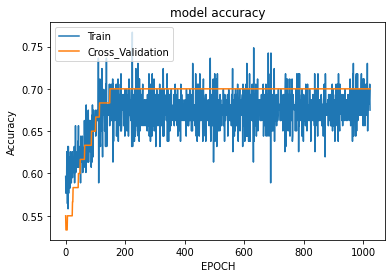

In [32]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.legend(['Train','Cross_Validation'], loc = 'upper left')
plt.show()

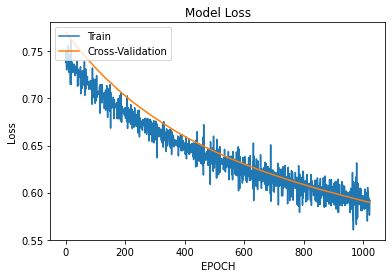

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['Train','Cross-Validation'], loc='upper left')
plt.show()

In [34]:
# Loss functions are dropping, which indicates that the model may perform better if we increase epochs.


In [35]:
print('Train Split : ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose = 1)

print('Accuracy :  {:5.2f}'.format(accuracy))

Train Split : 
6/6 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.6872
Accuracy :   0.69


In [36]:
print('Evaluation Split : ')
loss, accuracy = model.evaluate(normed_valid_data, valid_labels, verbose = 2)

print('Accuracy :  {:5.2f}'.format(accuracy))

Evaluation Split : 
2/2 - 0s - loss: 0.5896 - accuracy: 0.7000
Accuracy :   0.70


In [37]:
print('Test Split : ')
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose = 2)

print('Accuracy :  {:5.2f}'.format(accuracy))

Test Split : 
2/2 - 0s - loss: 0.6057 - accuracy: 0.6833
Accuracy :   0.68


# **Confusion Matrix**

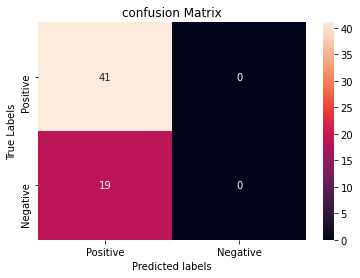

In [38]:
from sklearn.metrics import confusion_matrix

ax=plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)  #thershold for binary classification.

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax=ax) #annot is for annotating results.

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True Labels');
ax.set_title('confusion Matrix');
ax.xaxis.set_ticklabels(['Positive','Negative']);ax.yaxis.set_ticklabels(['Positive','Negative']);

In [39]:
# Our model predicts no false negatives for the Death Incidents. 
# This is the most desirable output as the error that the model predicts no heart disease and actually having death incident is dangerous.